# Ejercicio: recortar y unir imágenes

(512, 512, 3)


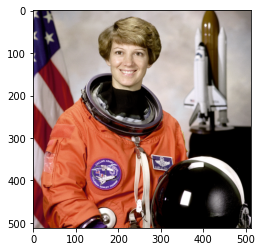

In [11]:
import matplotlib.pyplot as plt
from skimage import data

%matplotlib inline

img = data.astronaut()
print(img.shape)
plt.imshow(img)

In [12]:
#creacion de piezas
import numpy as np

def pieces(im,tile):
    h0,w0,_ = img.shape
    h,w = h0//tile, w0//tile

    img2 = img[:h*tile, :w*tile]

    piezas = [np.split(x, h, axis=1) for x in np.split(img2, w)]
    piezas = sum(piezas,[])
    return piezas

piezas = pieces(img,100)

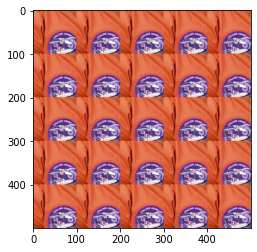

In [13]:
from random import randint as rnd

def grid(im,n):
    xs = np.vstack([im]*n) #xs = concatenacion de im, repetida n veces, a lo largo del eje vertical
    xss = np.hstack([xs]*n) #xss = concatenacion de xs, repetida n veces, a lo largo del eje horizontal
    return xss

plt.imshow(grid(piezas[rnd(0,len(piezas)-1)],5))

## Si la cámara tiene resolución de W pix x H pix y f= F pix. ¿A qué distancia debemos ponerla para que abarque completamente una escena de M metros de ancho?

In [17]:
def imgcalc(w,h,f,m):
    """Dada una cámara de resolución H x W px y una fistancia focal de F px, calcula el FOV horizontal en ángulos y 
       la distancia en metros para abarcar una escena de M metros""" 
    
    print('====================== DATOS ======================')
    print('Imagen de',h,'x',w,'pixels')
    print('Distancia focal f =',f,'pixels')
    print('Ancho de la escena capturada =',m,'metros')
    print('===================================================')
    print()
    '''
                           +
                          /|
                         / | 
                        /  |
                       /   |
                      /    |
                     /     |
                    /      |
                   /       |
                  /|       |
                 / |       |
                /  |       |
               /   |       |
              /    |       |
             /     |w/2    |
            /      |       | m/2
           /       |       |
          /        |       |
         /         |       |
        /          |       |
       /           |       |
      /            |       |
     /--+ FOV/2    |       |
    /   |          |       |
    +----------------------+
    <-------------->
           f
    <---------------------->
                x
    '''
    FOV = np.arctan((w/2)/f)*2
    print('FOV horizontal =', np.degrees(FOV), 'grados')
    x = (m/2) / np.tan(FOV/2)
    print('Distancia =', x, 'metros')
    return FOV,x
    
h,w,f,m = 800,600,1000,28
    
FOV,x = imgcalc(h,w,f,m)

====================== DATOS ======================
Imagen de 600 x 800 pixels
Distancia focal f = 1000 pixels
Ancho de la escena capturada = 28 metros

FOV horizontal = 43.60281897270362 grados
Distancia = 35.0 metros


### Teniendo en cuenta un diámetro de 0.24 m para una pelota de baloncesto, ¿qué longitud en pixels tendrá?

In [15]:
p = f*0.24/x
p #en pixels

6.857142857142857

### ¿A qué distancia estará la pelota si se ve con un diámetro de 15 pix?

In [16]:
d = f*0.24/15
d #en metros

16.0

## Utilizando stream.py como base, hacer un programa que dibuje un cuadrado rojo 4 veces más pequeño que el tamaño de la captura en el centro de la imagen

In [7]:
import cv2           as cv
from   umucv.stream  import autoStream
from   sympy.solvers import solve
from   sympy         import Symbol

x = Symbol('x')
y = Symbol('y')
factor = 4

for key,frame in autoStream():
    w,h,_ = frame.shape #Por algun motivo no devuelve H x W sino W x H
    startPoint = (int(solve(h//factor+2*x-h,x)[0])-1, int(solve(w//factor+2*y-w,y)[0])-1)
    '''
            x                               x
    <-------------->               <--------------->
    +----------------------------------------------+ ^
    |                                              | | 
    |                  w//factor                   | | y
    |              <--------------->               | v
    |              +---------------+               |
    |              |               | h//factor     |
    |              +---------------+               | ^
    |                                              | | y
    |                                              | | 
    +----------------------------------------------+ v
    <---------------------------------------------->
                             w
    
    
    '''
    cv.rectangle(frame,startPoint,(startPoint[0]+ int(h//factor),startPoint[1] + int(w//factor)),color = (0,0,255), thickness = -1)
    cv.imshow('input',frame)

cv.destroyAllWindows()

640x480 30.0fps


### Reproducir ese cuadrado en otra ventana
### Cambiar el canal de color de la ventana extra para que se vea en blanco y negro

In [8]:
x = Symbol('x')
y = Symbol('y')
factor = 4
for key,frame in autoStream():
    w,h,_ = frame.shape #Por algun motivo no devuelve H x W sino W x H
    startPoint = (int(solve(h//factor+2*x-h,x)[0])-1, int(solve(w//factor+2*y-w,y)[0])-1)
    
    frame2 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.rectangle(frame2,startPoint,(startPoint[0]+ int(h//factor),startPoint[1] + int(w//factor)),color = (0,0,255), thickness = -1)
    cv.imshow('input',frame)
    cv.imshow('input2',frame2)

cv.destroyAllWindows()

640x480 30.0fps


In [20]:
list(range(12))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]